In [ ]:
dx는 진단(diagnosis)을 의미
Actinic keratoses 및 intraepithelial carcinoma / Bowen's disease (akiec)
Basal cell carcinoma (bcc)
Benign keratosis-like lesions (solar lentigines / seborrheic keratoses 및 lichen-planus like keratoses, bkl)
Dermatofibroma (df)
Melanoma (mel)
Melanocytic nevi (nv)
Vascular lesions (angiomas, angiokeratomas, pyogenic granulomas 및 hemorrhage, vasc)

dx_type은 진단의 유형을 나타냅니다. 즉, 각 진단이 어떻게 확인되었는지를 나타냅니다.

histopathology (histo): 조직병리학적 검사를 통해 확인된 진단
follow-up examination (follow_up): 추적 검사를 통해 확인된 진단
expert consensus (consensus): 전문가 합의를 통해 확인된 진단
confirmation by in-vivo confocal microscopy (confocal): 인체 내 현미경을 사용하여 확인된 진단

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
for dirname, _, filenames in os.walk('./archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./archive\HAM10000_metadata.csv
./archive\hmnist_28_28_L.csv
./archive\hmnist_28_28_RGB.csv
./archive\hmnist_8_8_L.csv
./archive\hmnist_8_8_RGB.csv
./archive\HAM10000_images\ISIC_0024306.jpg
./archive\HAM10000_images\ISIC_0024307.jpg
./archive\HAM10000_images\ISIC_0024308.jpg
./archive\HAM10000_images\ISIC_0024309.jpg
./archive\HAM10000_images\ISIC_0024310.jpg
./archive\HAM10000_images\ISIC_0024311.jpg
./archive\HAM10000_images\ISIC_0024312.jpg
./archive\HAM10000_images\ISIC_0024313.jpg
./archive\HAM10000_images\ISIC_0024314.jpg
./archive\HAM10000_images\ISIC_0024315.jpg
./archive\HAM10000_images\ISIC_0024316.jpg
./archive\HAM10000_images\ISIC_0024317.jpg
./archive\HAM10000_images\ISIC_0024318.jpg
./archive\HAM10000_images\ISIC_0024319.jpg
./archive\HAM10000_images\ISIC_0024320.jpg
./archive\HAM10000_images\ISIC_0024321.jpg
./archive\HAM10000_images\ISIC_0024322.jpg
./archive\HAM10000_images\ISIC_0024323.jpg
./archive\HAM10000_images\ISIC_0024324.jpg
./archive\HAM10000_images\ISIC_0024

In [22]:
# Distribution graphs (histogram/bar graph) of column data
# 데이터프레임의 각 열에 대한 분포를 시각화하는 함수
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [40]:
# Correlation matrix
# 데이터프레임의 열 간 상관 관계를 시각화하는 함수
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna(axis='columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [37]:
# Scatter and density plots
# 데이터프레임의 수치형 열 간의 산점도 행렬과 밀도 그림을 시각화하는 함수
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [51]:
nRowsRead = 10015 # specify 'None' if want to read whole file
# HAM10000_metadata.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('./archive/HAM10000_metadata.csv', delimiter=',')#, nrows = nRowsRead)
df1.dataframeName = 'HAM10000_metadata.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10015 rows and 7 columns


In [63]:
df1


lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

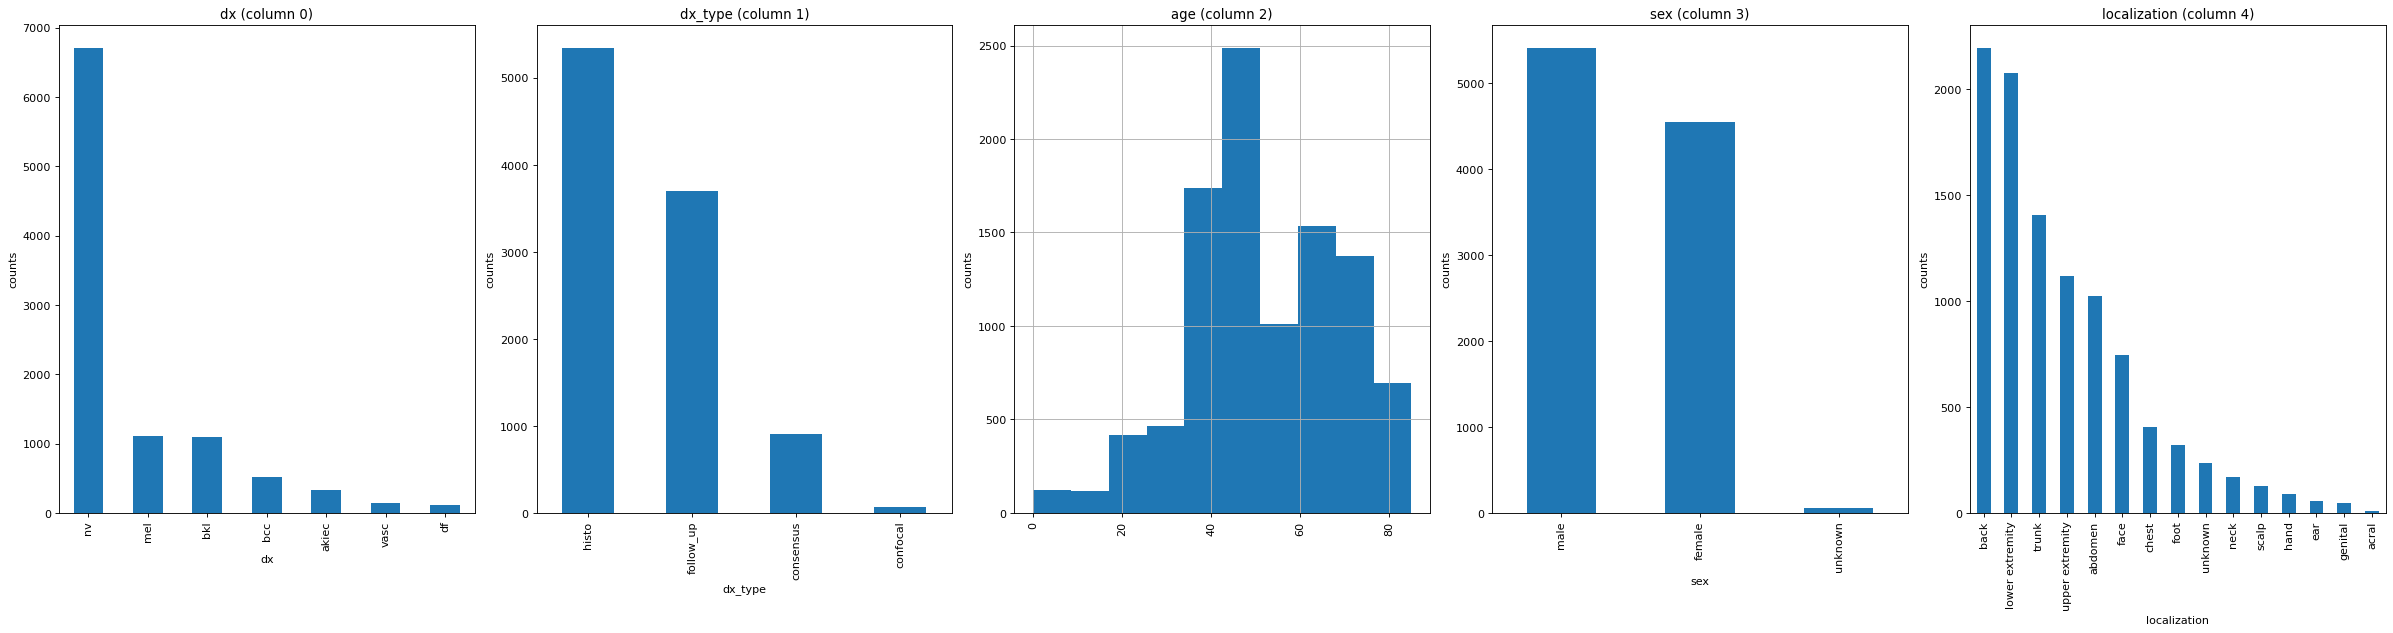

In [53]:
plotPerColumnDistribution(df1, 10, 5)

In [55]:
# nRowsRead = 1000 # specify 'None' if want to read whole file
# hmnist_28_28_L.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('./archive/hmnist_28_28_L.csv', delimiter=',')#, nrows = nRowsRead)
df2.dataframeName = 'hmnist_28_28_L.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10015 rows and 785 columns


In [62]:
df2

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            169        171        170        177        181        182   
1             19         57        105        140        149        148   
2            155        163        161        167        167        172   
3             25         71        116        139        136        153   
4            129        162        181        196        205        208   
...          ...        ...        ...        ...        ...        ...   
10010        172        171        173        175        164        187   
10011          2         34        108        116        114        119   
10012        122        154        162        170        179        197   
10013        137        143        141        139        147        152   
10014        149        157        157        152        151        152   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel0775  pixel0776  \
0            181        185        194        192  ...        184        186   
1            144        155        170        170  ...        172        175   
2            155        152        165        175  ...        163        178   
3            148        161        172        162  ...        125        135   
4            205        213        225        224  ...        210        197   
...          ...        ...        ...        ...  ...        ...        ...   
10010        207        210        208        206  ...        210        217   
10011        131        139        139        145  ...        173        169   
10012        200        195        202        199  ...        221        215   
10013        155        152        155        159  ...        172        171   
10014        154        163        149        145  ...        159        154   

       pixel0777  pixel0778  pixel0779  pixel0780  pixel0781  pixel0782  \
0            185        180        157        140        140        159   
1            160        144        114         89         47         18   
2            157        166        167        148        141        136   
3            138        137        111         71         32         16   
4            172        190        195        193        181        147   
...          ...        ...        ...        ...        ...        ...   
10010        221        209        185        187        192        192   
10011        168        168        143        138         83         23   
10012        205        187        209        198        187        164   
10013        175        183        177        170        169        166   
10014        145        106         67         62        103        146   

       pixel0783  label  
0            165      2  
1             18      2  
2            115      2  
3             16      2  
4             88      2  
...          ...    ...  
10010        192      0  
10011          3      0  
10012        156      0  
10013        170      0  
10014        148      6  

[10015 rows x 785 columns]

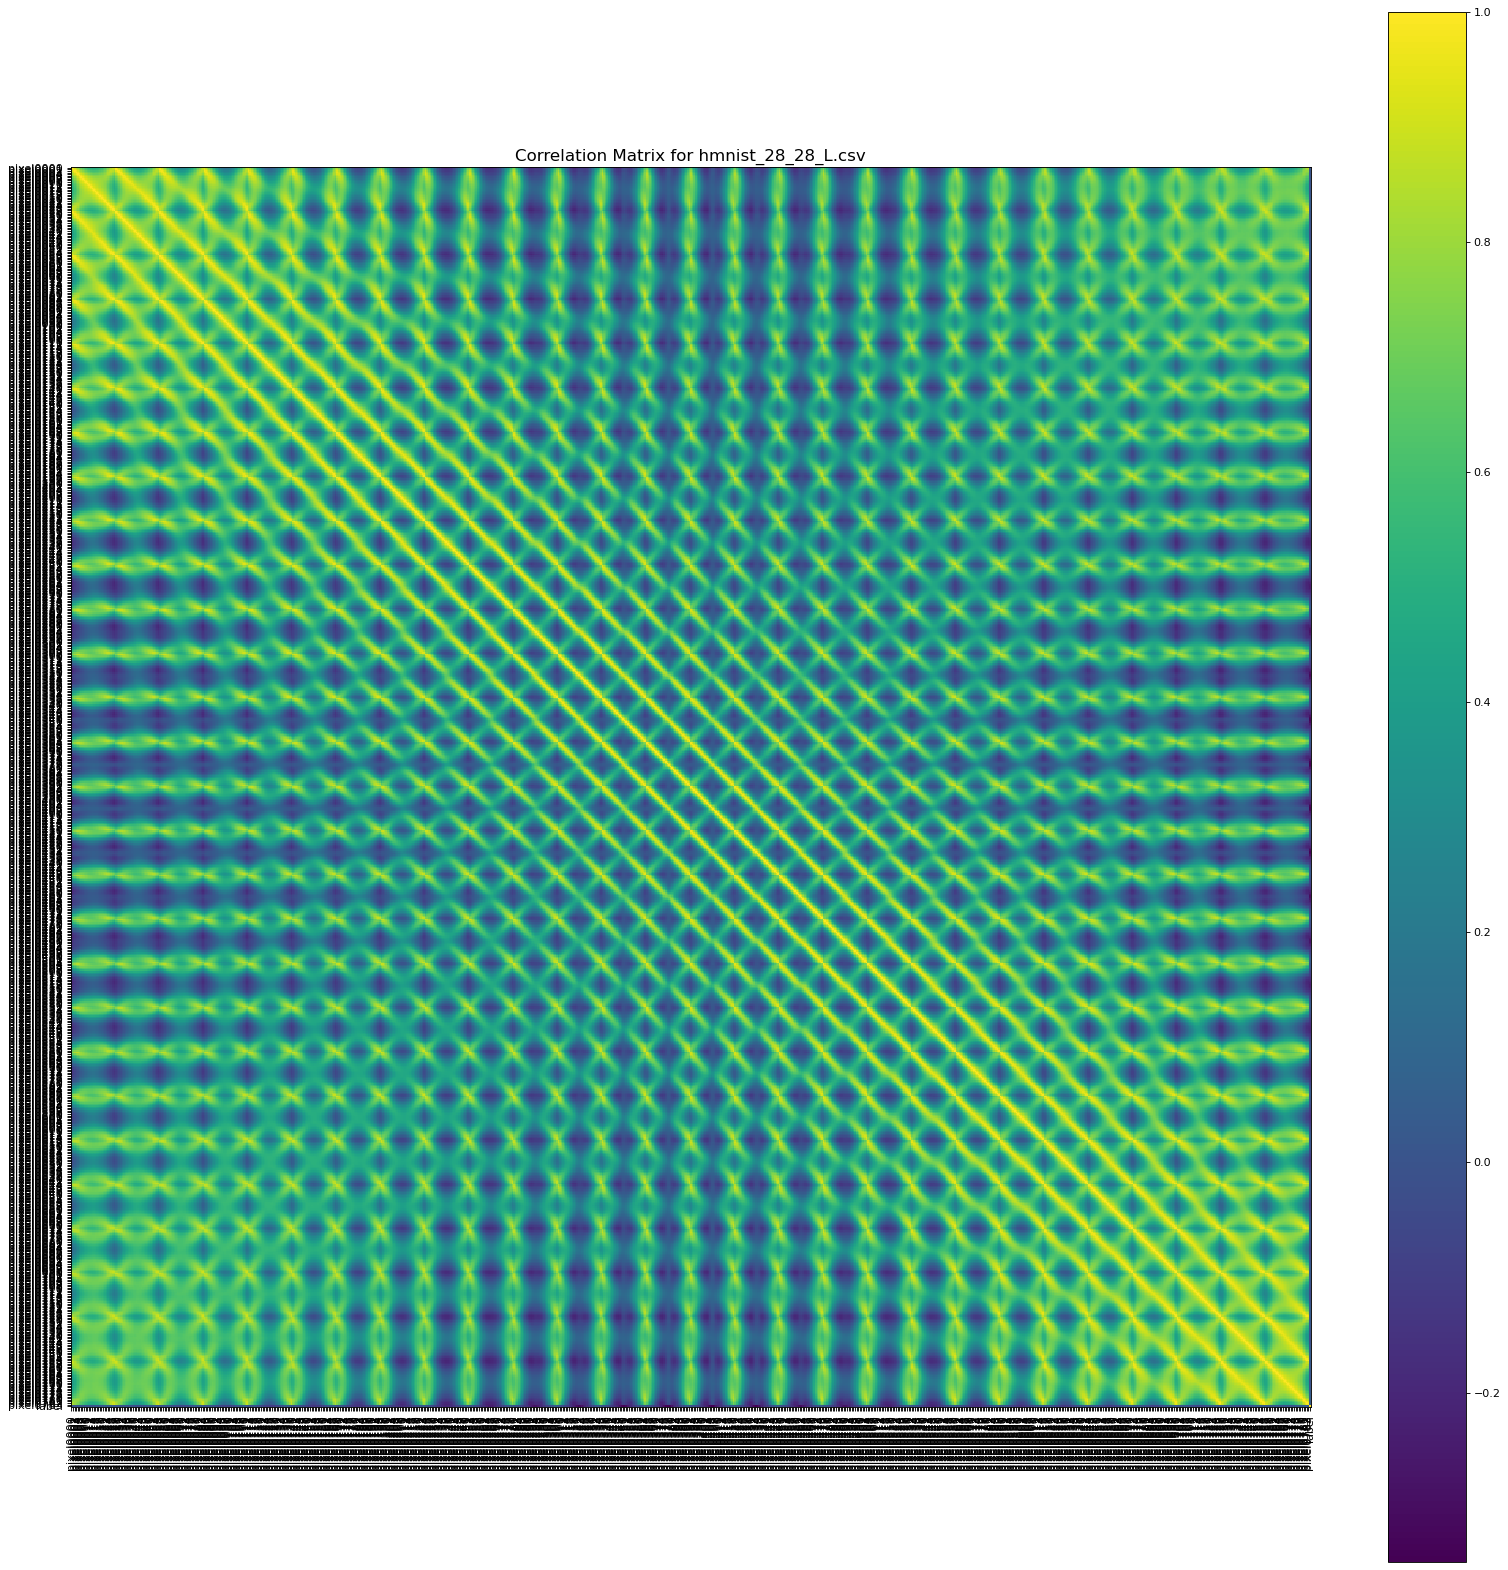

In [57]:
plotCorrelationMatrix(df2, 25)

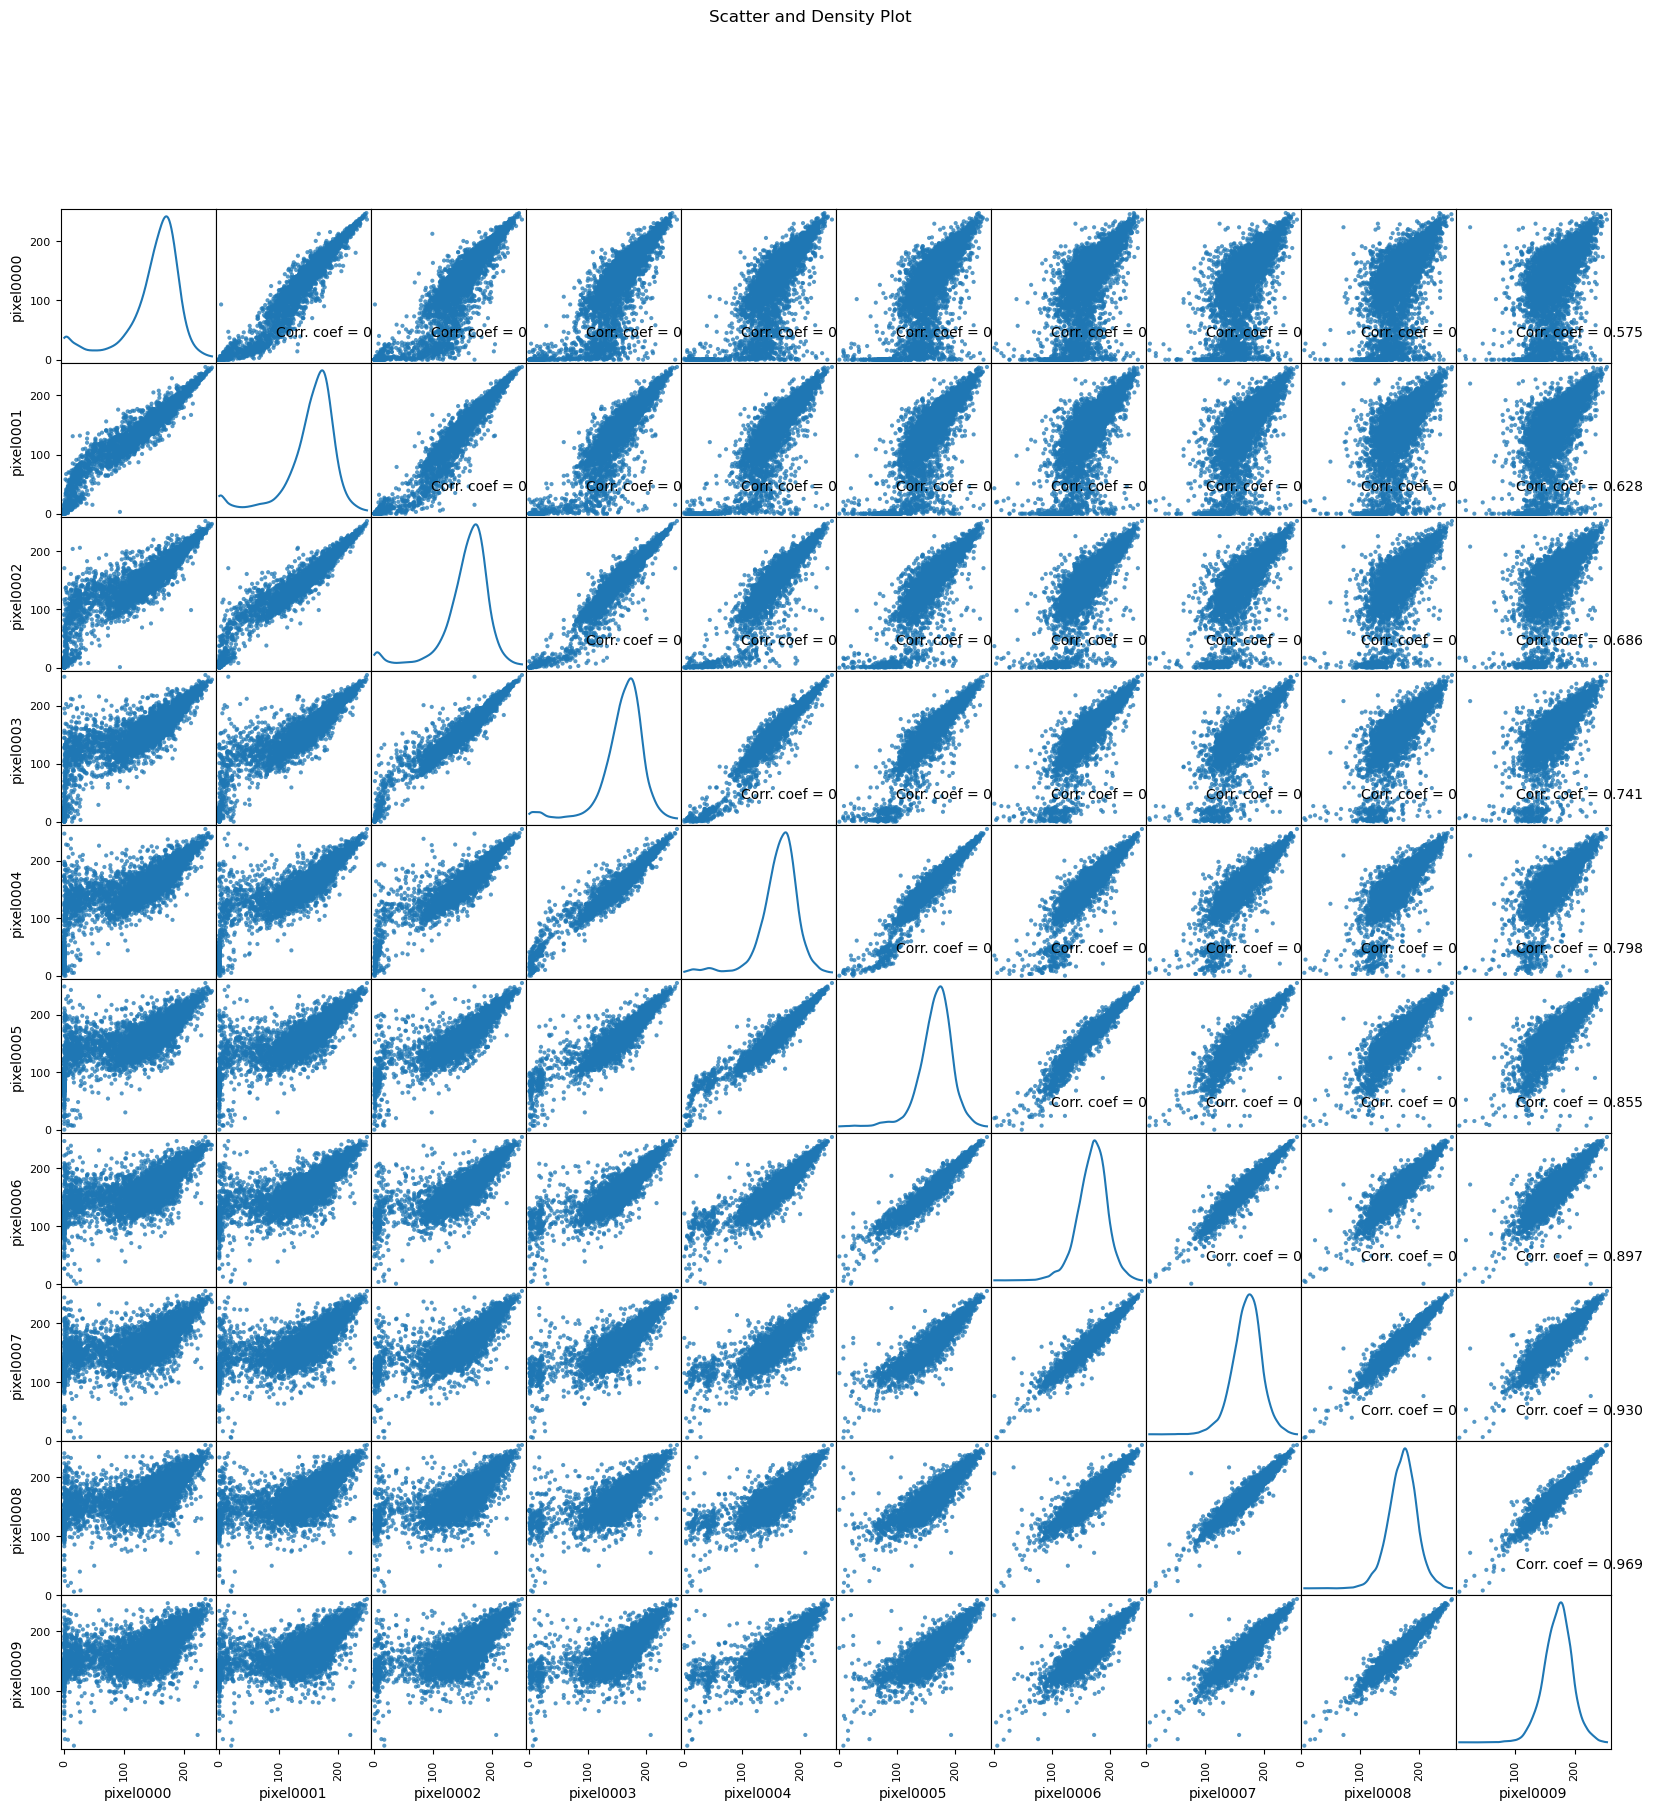

In [58]:
plotScatterMatrix(df2, 20, 10)

In [59]:
# nRowsRead = 1000 # specify 'None' if want to read whole file
# hmnist_28_28_RGB.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('./archive/hmnist_28_28_RGB.csv', delimiter=',')#, nrows = nRowsRead)
df3.dataframeName = 'hmnist_28_28_RGB.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10015 rows and 2353 columns


In [65]:
df3

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            192        153        193        195        155        192   
1             25         14         30         68         48         75   
2            192        138        153        200        145        163   
3             38         19         30         95         59         72   
4            158        113        139        194        144        174   
...          ...        ...        ...        ...        ...        ...   
10010        183        165        181        182        165        180   
10011          2          3          1         38         33         32   
10012        132        118        118        167        149        149   
10013        160        124        146        164        131        152   
10014        175        142        121        181        150        134   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0            197        154        185        202  ...        173        124   
1            123         93        126        158  ...         60         39   
2            201        142        160        206  ...        167        129   
3            143        103        119        171  ...         44         26   
4            215        162        191        225  ...        209        166   
...          ...        ...        ...        ...  ...        ...        ...   
10010        184        166        182        188  ...        208        185   
10011        121        104        103        132  ...         96         79   
10012        175        156        160        184  ...        204        181   
10013        167        127        146        169  ...        185        162   
10014        181        150        133        178  ...        159         79   

       pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0            138        183        147        166        185        154   
1             55         25         14         28         25         14   
2            143        159        124        142        136        104   
3             36         25         12         17         25         12   
4            185        172        135        149        109         78   
...          ...        ...        ...        ...        ...        ...   
10010        187        208        186        186        206        187   
10011         76         24         23         21          3          4   
10012        178        181        159        153        172        151   
10013        167        184        157        166        185        162   
10014         82        174        137        125        175        139   

       pixel2351  label  
0            177      2  
1             27      2  
2            117      2  
3             15      2  
4             92      2  
...          ...    ...  
10010        189      0  
10011          1      0  
10012        145      0  
10013        172      0  
10014        126      6  

[10015 rows x 2353 columns]

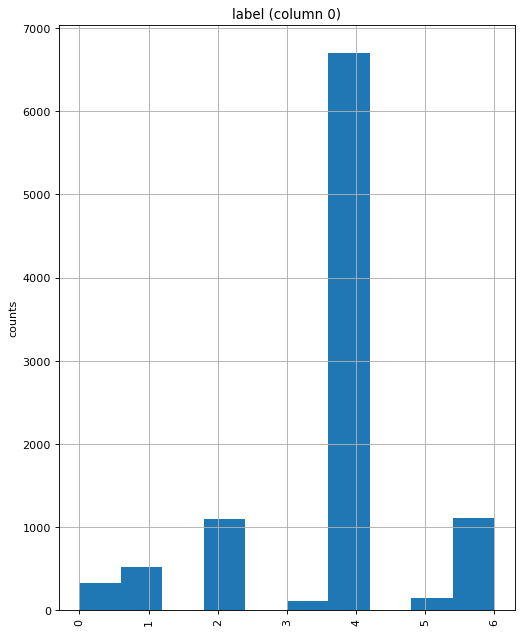

In [61]:
plotPerColumnDistribution(df3, 10, 5)